In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot

# data exploratory

In [6]:
raw = pd.read_csv('cgfinal414.csv')

In [7]:
raw = raw.drop(columns='id')

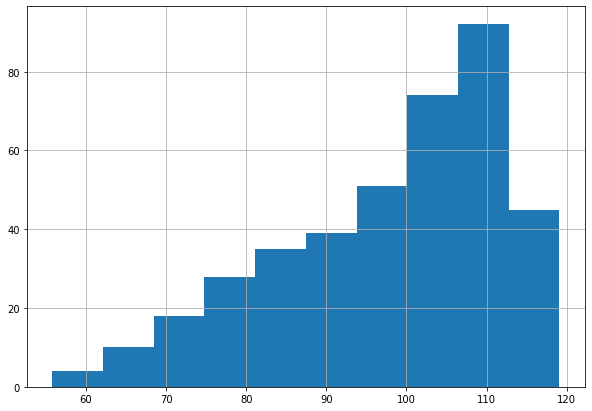

In [8]:
raw['SF12total'].hist(figsize=(10, 7))

In [9]:
raw1 = raw.dropna()

In [10]:
df_cgd=raw1

# one-hot encoding 

In [11]:

one_hot = pd.get_dummies(raw1['StudyArm'])
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

one_hot = pd.get_dummies(df_cgd['incomecat'],prefix='incomecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('incomecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)
df_cgd = df_cgd.drop('incomecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['gradecat'],prefix='gradecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('gradecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('gradecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['relationship_cat'],prefix='relationship_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('relationship_cat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('relationship_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['racecat'],prefix='race_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('racecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('race_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['TTC3'],prefix='TTC3')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('TTC3',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('TTC3_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['GI_Lung'],prefix='GI_Lung')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('GI_Lung',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('GI_Lung_3.0',axis = 1)

In [12]:
raw1=df_cgd

In [13]:
raw1.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'cgdistress',
       'cggad7', 'cgphq2', 'SF12total', 'AGG_PHYS', 'AGG_MENT', 'Control',
       'GA', 'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0'], dtype=object)

# transfer the sf12total into catagorial(from regression to classification)

In [14]:
raw1['SF12total'].describe()

count    380.000000
mean      97.932813
std       14.209496
min       55.783994
25%       88.692658
50%      102.153329
75%      109.648195
max      119.095521
Name: SF12total, dtype: float64

In [15]:
pd.qcut(raw1['SF12total'],q=[0, .25, 1]).value_counts()

(88.693, 119.096]    285
(55.783, 88.693]      95
Name: SF12total, dtype: int64

In [16]:
pd.cut(raw1['SF12total'],bins=4).value_counts()

(103.268, 119.096]    175
(87.44, 103.268]      113
(71.612, 87.44]        69
(55.721, 71.612]       23
Name: SF12total, dtype: int64

In [17]:
raw1['SF12total_BIN'] = pd.qcut(raw1['SF12total'],q=[0, .25, 1],labels=[1.0,0.0])

In [18]:
raw1[['SF12total','SF12total_BIN']]

,SF12total,SF12total_BIN
6,106.520496,0.0
7,105.107170,0.0
8,105.878769,0.0
10,110.634352,0.0
11,104.744417,0.0
...,...,...
409,102.702713,0.0
410,87.114771,1.0
411,55.783994,1.0
412,95.192964,0.0


In [19]:
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['SF12total_BIN']

In [20]:
X

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,...,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
6,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,0
7,69.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,1,0
8,57.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,1,0
10,71.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1,...,0,0,1,0,1,0,1,0,1,0
11,52.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,75.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,1
410,71.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,1,0,1,0,0,1,0,0
411,75.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,1,0,1,0,0,1,1,0
412,67.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,0,1,1,0,1,0,0,1,0,1


In [21]:
y = y.astype(float)

In [22]:
y

6      0.0
7      0.0
8      0.0
10     0.0
11     0.0
      ... 
409    0.0
410    1.0
411    1.0
412    0.0
413    0.0
Name: SF12total_BIN, Length: 380, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

# train test split 

In [24]:
# random state = 42 for consistancy 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [25]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 214), (1.0, 71)]
[(0.0, 71), (1.0, 24)]


In [26]:
X_test.shape

(95, 31)

In [27]:
X_test.columns


Index(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c', 'TTC6d',
       'distress', 'ImpairedPolypharmacy', 'cognition', 'nutrition',
       'phy_performance', 'function', 'ImpairedCom', 'psychological',
       'ImpairedMS', 'calcimpairedCom', 'Control', 'incomecat_1.0',
       'incomecat_2.0', 'gradecat_1.0', 'gradecat_2.0', 'relationship_cat_1.0',
       'relationship_cat_2.0', 'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0',
       'TTC3_2.0', 'GI_Lung_1.0', 'GI_Lung_2.0'],
      dtype='object')

In [ ]:
# data shows imbalance 

Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

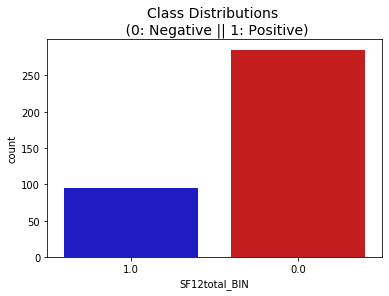

In [28]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('SF12total_BIN', data=raw1, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

In [29]:
y.shape

(380,)

In [30]:
print(sorted(Counter(y).items()))

[(0.0, 285), (1.0, 95)]


# in this variable we skipped the pca process

# LogisticRegression
### setting lgr as baseline model

In [31]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.linear_model import LogisticRegression
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('lgr',  LogisticRegression(random_state=42,class_weight = {0:1,1:0.002}))
    ])

param_grid = {

}
# Create a based model

# Instantiate the grid search model
grid_searchlgr = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1)

In [32]:
grid_searchlgr.fit(X_train, y_train)
grid_searchlgr.best_params_

{}

In [33]:
grid_searchlgr.best_score_

0.0

In [34]:

# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
lgrres = grid_searchlgr.predict(X_test)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[71  0]
 [24  0]]


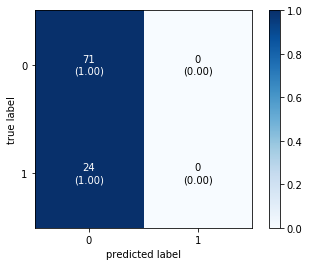

In [36]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[71,0],
 [ 24, 0]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### visualizing roc

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722


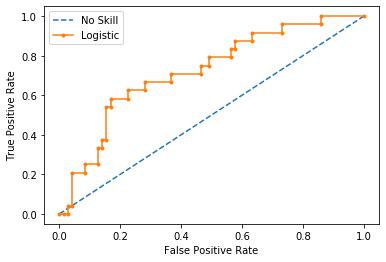

In [35]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVC 


In [33]:
# setting hyperparameters
c=[]
for i in range(-12,12):
    c.append(2**i)
gamma=[]
for j in range(-12,12):
    gamma.append(2**j)
print(c)

[0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42
from sklearn.svm import SVC
modelsvmf1 = Pipeline([
        ('svm',  SVC(random_state=42,probability=True,class_weight = {0:1,1:3.3}))
    ])


# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': c, 

              'svm__gamma': gamma}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=5, return_train_score=True,scoring="f1")


svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_
svmgridsearchf1.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 203 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 2436 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   12.7s finished


{'svm__C': 32, 'svm__gamma': 0.0009765625}

In [35]:
svmgridsearchf1.best_score_

0.49142857142857144

In [36]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = svmgridsearchf1.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[44 27]
 [ 6 18]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722
svm: ROC AUC=0.745


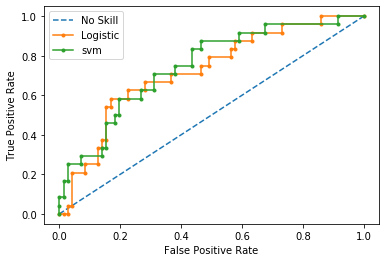

In [37]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvm = lr_probssvm[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# gradient boost

In [39]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import GradientBoostingClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('gb', GradientBoostingClassifier(random_state=42,subsample=0.8))
    ])

param_grid = {
        'gb__learning_rate': [0.1,0.01,1,10],
        'gb__n_estimators': [10,20,25,30,45, 50,60,70,80],
        'gb__min_samples_split': [0.003,0.0025,0.0035,0.001],
        'gb__min_samples_leaf': [0.003,0.0025,0.0035,0.001],
        'gb__max_depth': [5,6,7,8,10,15,18,20,25,30],
        
        
}

# Create a based model

# Instantiate the grid search model
grid_searchgb = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [40]:
grid_searchgb.fit(X_train, y_train)
grid_searchgb.best_params_


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1034 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1664 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 2474 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 3230 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 3698 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 4238 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 4850 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5534 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6290 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 7118 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8018 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 8990 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 10034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 11150 tasks  

{'gb__learning_rate': 0.1,
 'gb__max_depth': 10,
 'gb__min_samples_leaf': 0.003,
 'gb__min_samples_split': 0.003,
 'gb__n_estimators': 50}

In [41]:
print(grid_searchgb.best_score_)
print(grid_searchgb.score(X_test,y_test))

0.39831183309444174
0.38888888888888895


In [42]:
rfsmotey = grid_searchgb.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)


[[66  5]
 [17  7]]


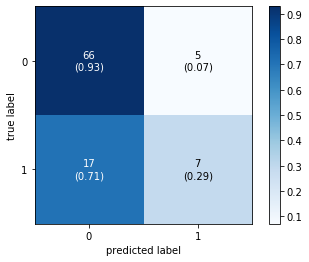

In [43]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[66,5],
 [ 17, 7]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [47]:
feature_names = np.array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0'])

In [48]:
feature_names

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0', 'gradecat_2.0',
       'relationship_cat_1.0', 'relationship_cat_2.0', 'race_cat_1.0',
       'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0', 'GI_Lung_1.0',
       'GI_Lung_2.0'], dtype='<U20')

In [50]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 0.003,
          'learning_rate': 0.1, 'min_samples_leaf': 0.003}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.003, min_samples_split=0.003,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### visualing feature importance

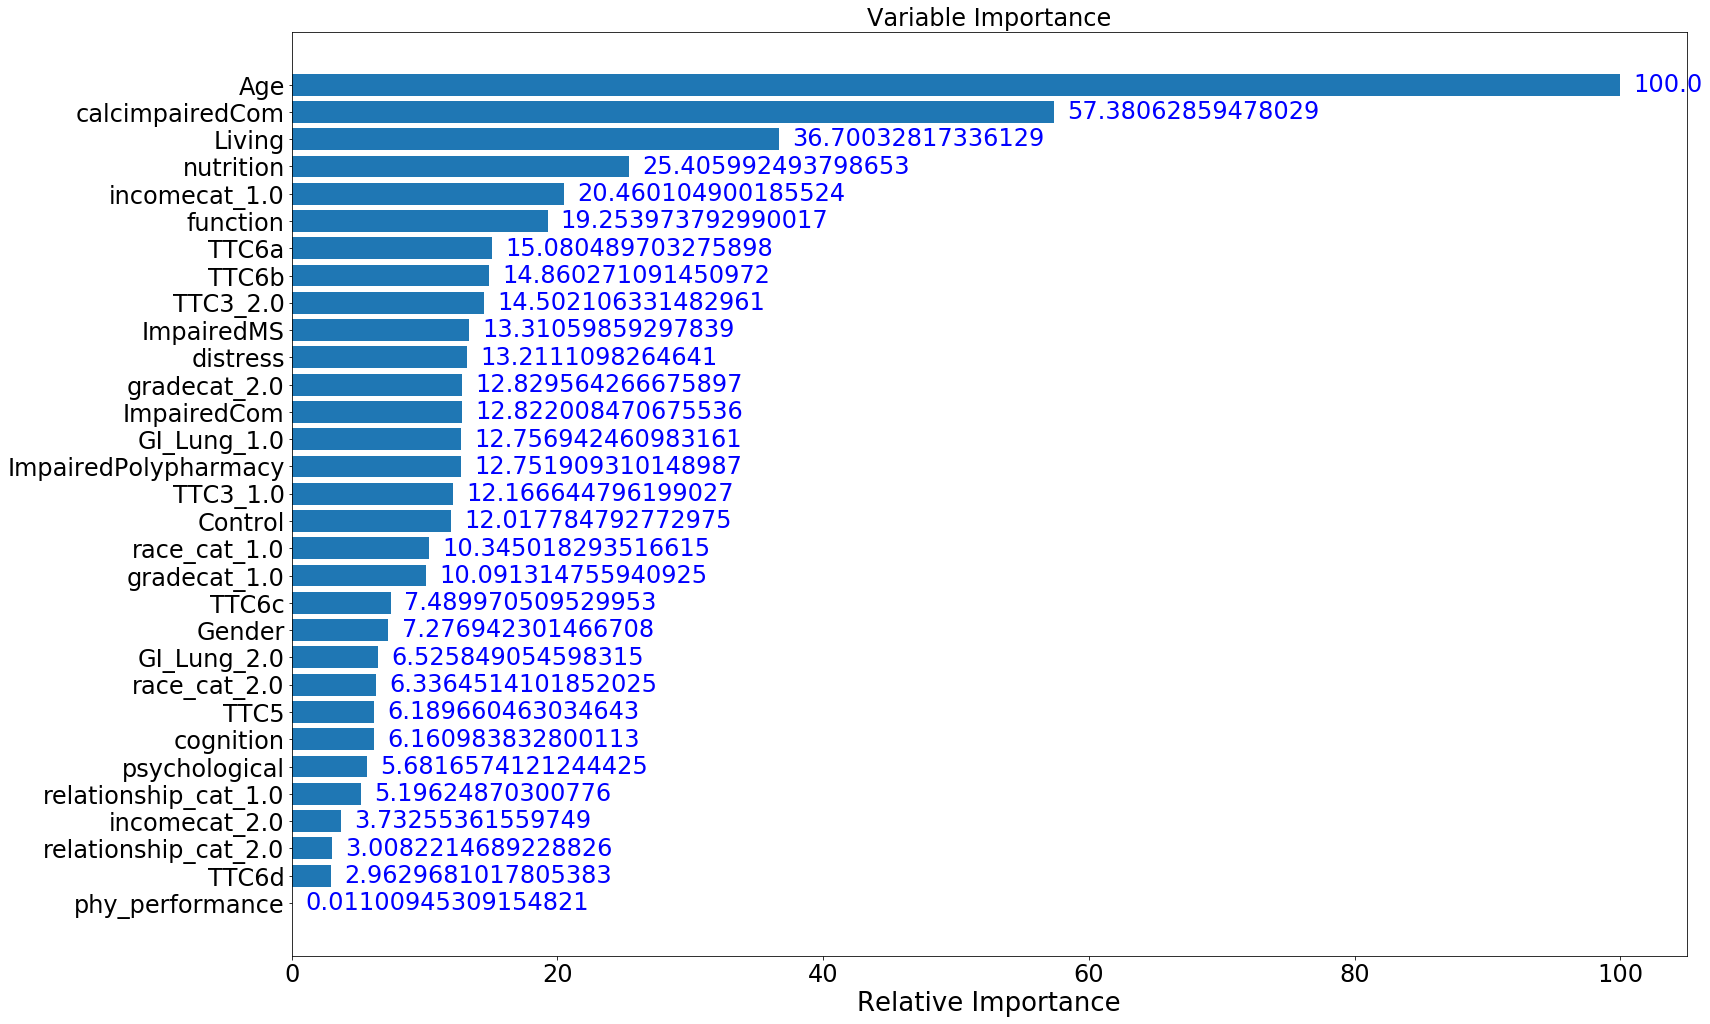

In [51]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig= pyplot.figure(figsize=(25,17))

SMALL_SIZE = 24
MEDIUM_SIZE = 26
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 1, i + .25, str(v), color='blue')
    
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= grid_searchgb.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=0.05).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.444790
[[51 20]
 [ 9 15]]


### visualizing ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722
gb: ROC AUC=0.702


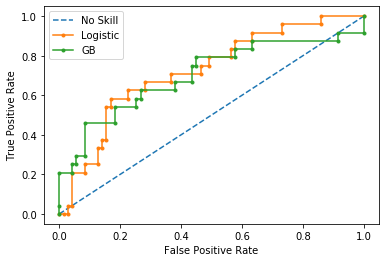

In [45]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsgb = lr_probsgb[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gb_auc = roc_auc_score(y_test, lr_probsgb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('gb: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# RUS
### Random under-sampling integrating in the learning of an AdaBoost classifier.

In [114]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modeleb = Pipeline([
        ('rus', RUSBoostClassifier(random_state=42))
    ])

param_gridx = {
        
        'rus__n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 200, 400,600],
        
       
        'rus__sampling_strategy': ['auto'],
        'rus__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.001, 0.003, 0.005, 0.007, 0.1, 0.3, 0.5, 0.7],
        'rus__replacement': [False,True]

}


# Create a based model

# Instantiate the grid search model
grid_searchrus1 = GridSearchCV(estimator = modeleb, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrus1.fit(X_train, y_train)
grid_searchrus1.best_params_

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

{'rus__learning_rate': 0.007,
 'rus__n_estimators': 61,
 'rus__replacement': True,
 'rus__sampling_strategy': 'auto'}

In [115]:

from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrus1.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[48 23]
 [ 7 17]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.802
RUS: ROC AUC=0.789


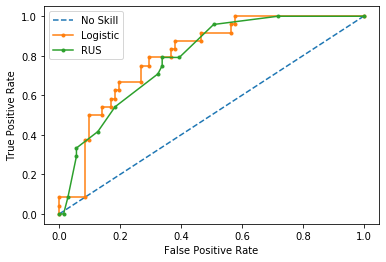

In [116]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrus = grid_searchrus1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrus = lr_probsrus[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rus_auc = roc_auc_score(y_test, lr_probsrus)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RUS: ROC AUC=%.3f' % (rus_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rus_fpr, rus_tpr, marker='.', label='RUS')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# BRF BalancedRandomForestClassifier

In [52]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrfx = Pipeline([
        ('brf', BalancedRandomForestClassifier(random_state=42,class_weight = {0:1,1:1.9549},n_jobs=-1))
    ])

param_gridx = {
#         'brf__max_features': [0.03,0.07,0.13, 0.15, 0.25,0.5,0.75,0.8,0.9,1],
#         'brf__n_estimators': [10,25,45, 60,80, 110, 148, 200,400],
#         'brf__min_samples_split': [2, 3, 5, 8,10, 12],
#         'brf__min_samples_leaf': [ 2, 4,8,10,12,15,20,40],
#         'brf__max_depth': [5,10, 20,40, 60, None ],
#         'brf__sampling_strategy': ['auto']
        'brf__max_depth': [20],
        'brf__max_features': [0.25],
        'brf__min_samples_leaf': [1],
        'brf__min_samples_split': [3],
        'brf__n_estimators': [45],
        'brf__sampling_strategy': ['auto']
#         'brf__max_features': [0.8],
#         'brf__n_estimators': [10],
#         'brf__min_samples_split': [2],
#         'brf__min_samples_leaf': [12],
#         'brf__max_depth': [10],
#         'brf__sampling_strategy': ['auto']
    

}

# Create a based model

# Instantiate the grid search model
grid_searchrfx = GridSearchCV(estimator = modelrfx, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrfx.fit(X_train, y_train)
grid_searchrfx.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


{'brf__max_depth': 20,
 'brf__max_features': 0.25,
 'brf__min_samples_leaf': 1,
 'brf__min_samples_split': 3,
 'brf__n_estimators': 45,
 'brf__sampling_strategy': 'auto'}

In [57]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

params = {'max_depth': 20,
 'max_features': 0.25,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 45,
 'sampling_strategy': 'auto'}
clfrf = BalancedRandomForestClassifier(random_state=42,class_weight = {0:1,1:1.9549},n_jobs=-1)

clfrf.fit(X_train, y_train)


BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                               class_weight={0: 1, 1: 1.9549}, criterion='gini',
                               max_depth=None, max_features='auto',
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=-1, oob_score=False, random_state=42,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

### visualizing feature importance 

In [61]:
feature_importance = clfrf.feature_importances_
# make importances relative to max importance
feature_importance = feature_importance 
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig= pyplot.figure(figsize=(50,50))

SMALL_SIZE = 24
MEDIUM_SIZE = 26
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])

for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 1, i + .25, str(v), color='blue')
    
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [53]:
print(grid_searchrfx.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrfx.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)

0.40823226045224326
[[52 19]
 [ 7 17]]


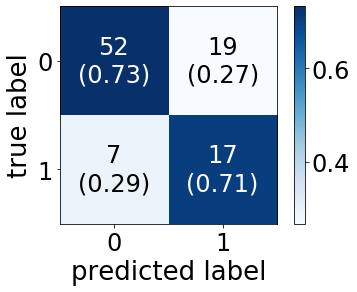

In [54]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[52,19],
 [ 7, 17]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722
RF: ROC AUC=0.809


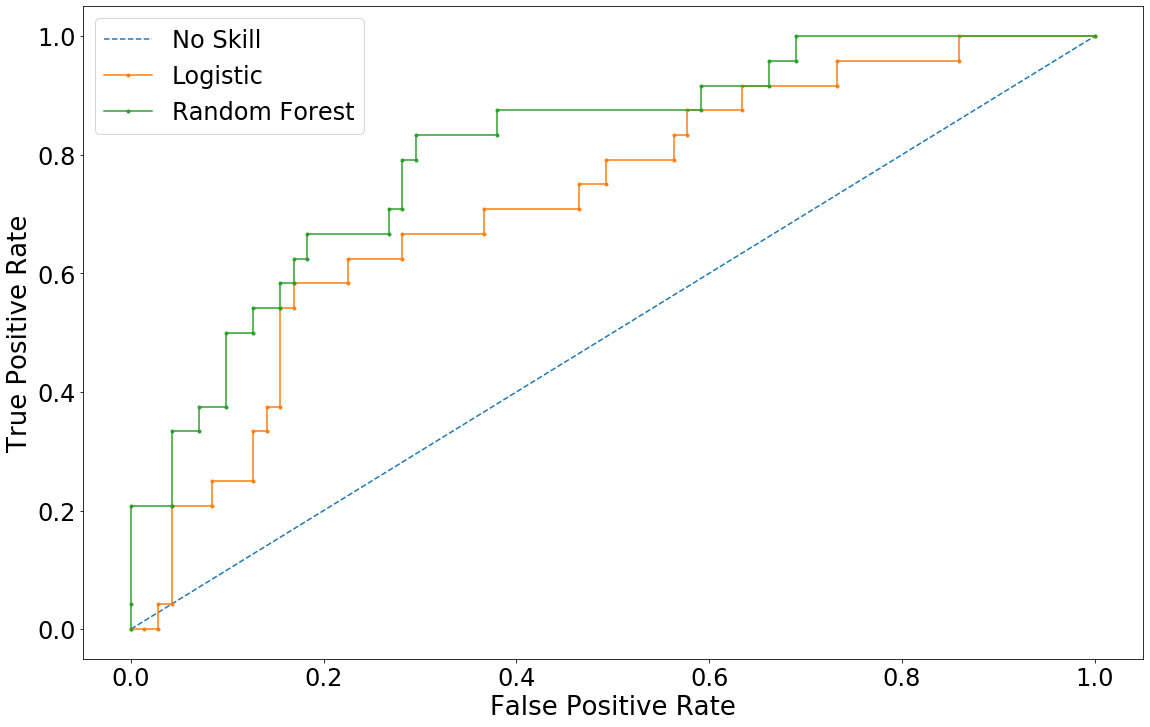

In [55]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fig= pyplot.figure(figsize=(19,12))
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [306]:
print(grid_searchrfx.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrfx.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)


0.40584179011785915
[[34 43]
 [ 3 15]]


In [307]:
grid_searchrfx.score(X_test,y_test)

0.39473684210526316

## intergrating ROCs

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722
RF: ROC AUC=0.809


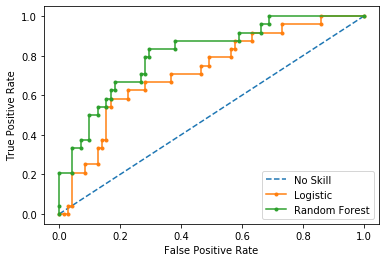

In [514]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

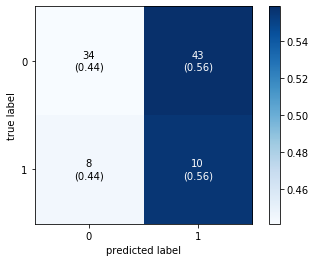

In [518]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[34,43],
 [ 8, 10]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [117]:
n_est = []
for i in range(25,101):
    n_est.append(i)

n_est.append(200)
n_est.append(400)
    
print(n_est)
lr = []
for j in np.arange(0, 1.1, 0.1):
    lr.append(j)
    
lr.append(0.01)
lr.append(0.03)
lr.append(0.05)
lr.append(0.07)    
print(lr)


[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 200, 400]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.01, 0.03, 0.05, 0.07]


In [105]:
[0.01, 0.03, 0.05, 0.07]+[ 0.001, 0.003, 0.005, 0.007]+[ 0.1, 0.3, 0.5, 0.7]

[0.01, 0.03, 0.05, 0.07, 0.001, 0.003, 0.005, 0.007, 0.1, 0.3, 0.5, 0.7]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722
RF: ROC AUC=0.809
svm: ROC AUC=0.745
gb: ROC AUC=0.702
RUS: ROC AUC=0.789


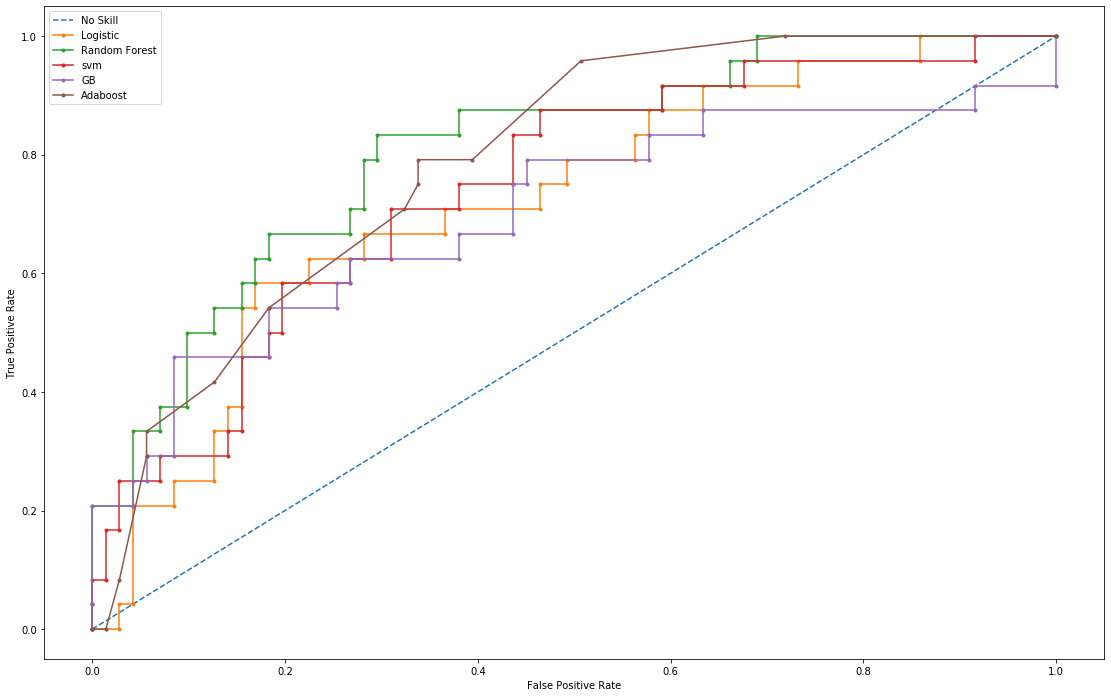

In [522]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fig= pyplot.figure(figsize=(19,12))
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)
lr_probsrus = grid_searchrus1.predict_proba(X_test)





# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
lr_probssvm = lr_probssvm[:, 1]
lr_probsgb = lr_probsgb[:, 1]
lr_probsrus = lr_probsrus[:, 1]






# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
svm_auc = roc_auc_score(y_test, lr_probssvm)
gb_auc = roc_auc_score(y_test, lr_probsgb)
rus_auc = roc_auc_score(y_test, lr_probsrus)



# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))

print('gb: ROC AUC=%.3f' % (gb_auc))
print('RUS: ROC AUC=%.3f' % (rus_auc))



# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)

gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)
rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)




# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB')
pyplot.plot(rus_fpr, rus_tpr, marker='.', label='Adaboost')





# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()